In [30]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

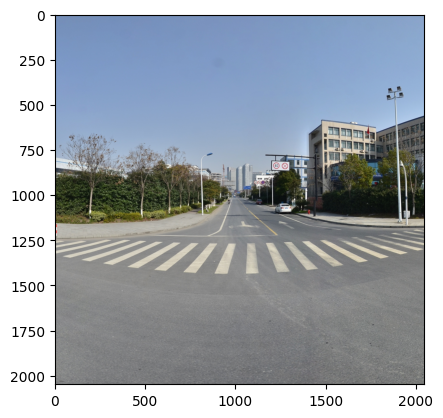

In [31]:
imgpath = '../dataset/images/train/98782.jpg'
img = cv2.imread(imgpath)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [32]:
height, width, channels = img.shape
tot = np.sum(img, axis=2)

gray = np.maximum(img[..., 0] / tot, img[..., 2] / tot)
gray = (gray * 255).astype(np.uint8)

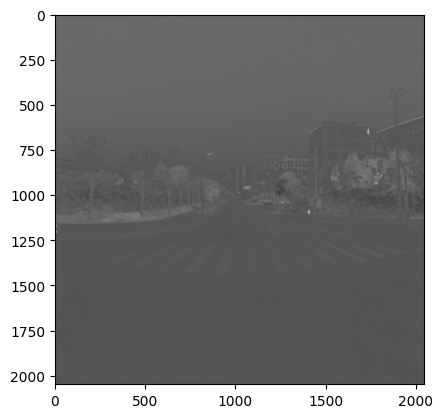

In [33]:
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

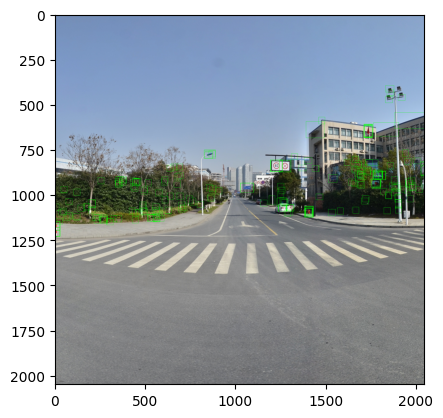

In [79]:
mser = cv2.MSER_create(delta=5, min_area=5,min_diversity = 0, max_variation=0.5)
regions, boxes = mser.detectRegions(gray)
img_with_regions = img.copy()
height, width = img_with_regions.shape[0]/64, img_with_regions.shape[1]/64
boxes[:, 0] -= max(int(height), 32)//2
boxes[:, 1] -= max(int(height), 32)//2
boxes[:, 2] += max(int(height), 32)
boxes[:, 3] += max(int(height), 32)

for box in boxes:
    x, y, w, h = box
    cv2.rectangle(img_with_regions, (x,y),(x+w, y+h), (0, 255, 0), 1)
plt.imshow(cv2.cvtColor(img_with_regions, cv2.COLOR_BGR2RGB))

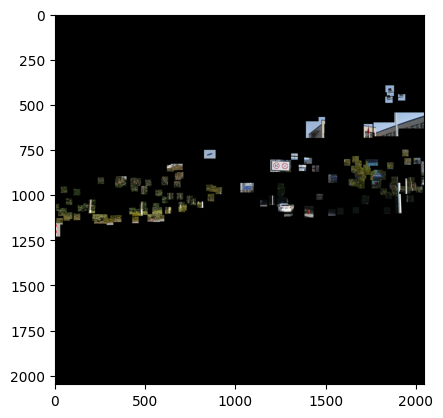

In [80]:
text_mask = np.zeros_like(img)
for box in boxes:
    x, y, w, h = box
    start_point = (x, y)
    end_point = (x+w, y+h)
    points = np.array([[start_point, (start_point[0], end_point[1]), end_point, (end_point[0], start_point[1])]])
    cv2.fillPoly(text_mask, points, (255, 255, 255))

text_mask = cv2.cvtColor(text_mask, cv2.COLOR_BGR2GRAY)
text_mask = np.uint8(text_mask)
text_region = cv2.bitwise_and(img, img, mask=text_mask)
plt.imshow(cv2.cvtColor(text_region, cv2.COLOR_BGR2RGB))